In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.optimize as optimize
import crr.reconstruct as reconstruct
import crr.scattered.sampling as sampling
import crr.scattered.roll_zeropad as roll_zeropad
matplotlib.rcParams['font.size'] = 16
import astropy.wcs as wcs

In [2]:
def wcs_simple(racen, deccen, pixscale, npix, pa):
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = [npix // 2, npix // 2]
    w.wcs.cdelt = np.array([pixscale / 3600., pixscale / 3600.])
    w.wcs.crval = [racen, deccen]
    w.wcs.ctype = ["RA---TAN", "DEC--TAN"]
    w.pixel_shape = (npix, npix)
    w.wcs.pc[0, 0] = np.cos(pa * np.pi / 180.)
    w.wcs.pc[0, 1] = np.sin(pa * np.pi / 180.)
    w.wcs.pc[1, 0] = - np.sin(pa * np.pi / 180.)
    w.wcs.pc[1, 1] = np.cos(pa * np.pi / 180.)
    return(w)

In [3]:
n = 41
wi = wcs_simple(180., 0., 0.4, n, 0)
wo = wcs_simple(180., 0. - 0.1 / 3600., 0.4, n, 0)

In [4]:
xi = np.outer(np.arange(n) - 15., np.ones(n))
yi = np.outer(np.ones(n), np.arange(n) - 15.)
sig = 1.1
imagei = np.exp(- 0.5 * (xi**2 + yi**2) / sig**2)

In [5]:
rw = reconstruct.ReconstructWCS(inwcs=wi, outwcs=wo)

def psf(x, y, i):
    sig = 1.
    g = np.exp(- 0.5 * (x**2 + y**2) / sig**2) / (2. * np.pi * sig**2)
    return(g)
rw.psf = psf

In [6]:
rw.set_grid()
rw.set_Amatrix()
# rw.set_patches(poverlap=0, pminsize=40)


In [7]:
rw.set_weights()

False
here
here2


(0.0, 20.0)

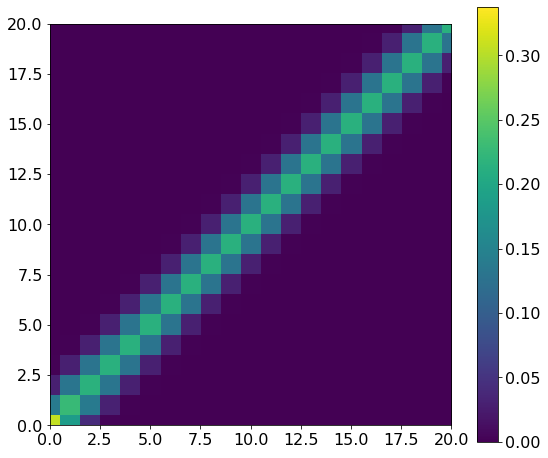

In [8]:
plt.imshow(rw.R)
plt.colorbar()
plt.xlim([0, 20])
plt.ylim([0, 20])

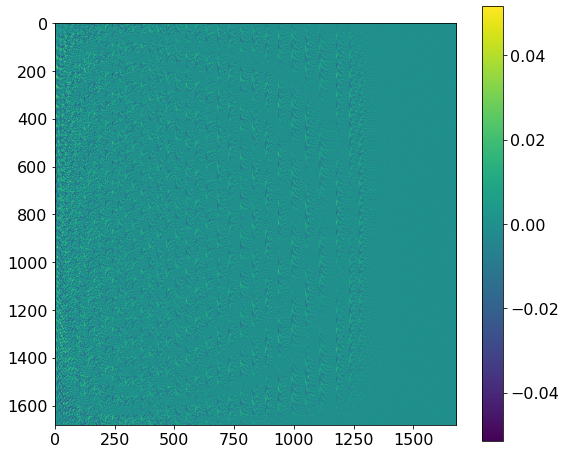

In [9]:
plt.imshow(rw.V)
plt.colorbar()

In [10]:
imageo = rw.apply_weights(imagei.flatten()).reshape(n, n)

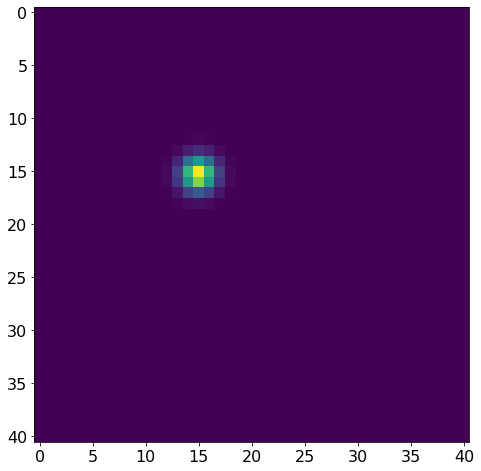

In [11]:
plt.imshow(imageo)

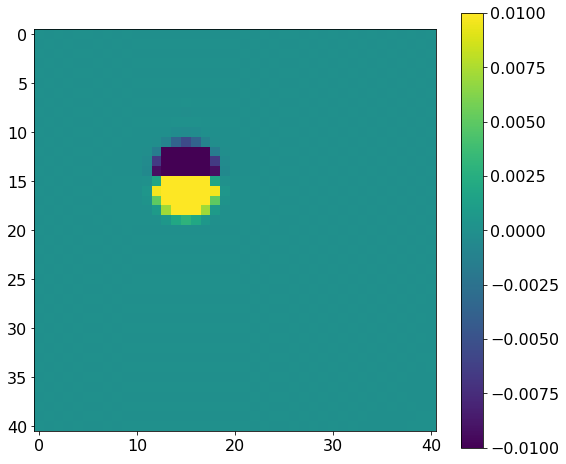

In [12]:
imaget = np.exp(- 0.5 * ((yi)**2 + (xi + 0.5)**2) / sig**2) 
plt.imshow(imageo - imaget, vmax=0.01, vmin=-0.01)
plt.colorbar()

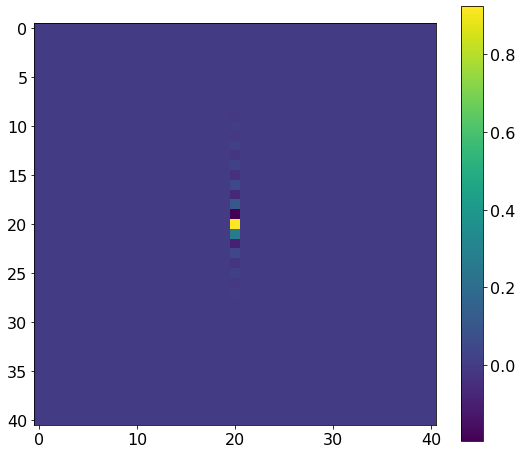

In [13]:
plt.imshow((rw.weights[:, (n * n) // 2]).reshape(n, n))
plt.colorbar()

(-0.05, 0.05)

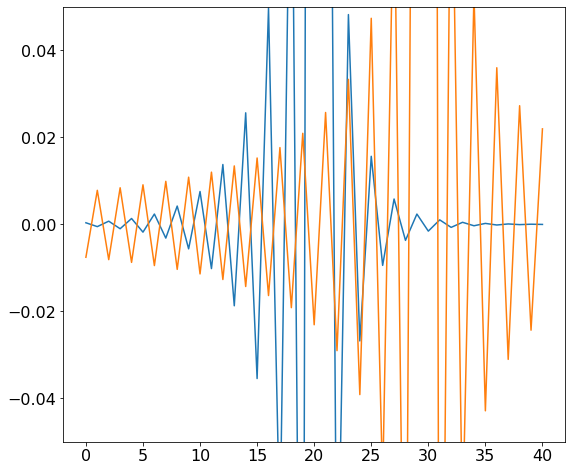

In [14]:
plt.plot((rw.weights[:, (n * n) // 2]).reshape(n, n)[:, n // 2])
xx = np.arange(n)
plt.plot(xx, np.sin((xx - 29.75) * np.pi) / (xx - 29.75) / np.pi)
plt.ylim([-0.05, 0.05])